In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [4]:
X_test.shape

(10000, 784)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train[1000]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 97],
        [ 84],
        [ 97],
        [110],
        [108],
        [ 87],
        [ 97],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 19],
        [255],
        [199],
        [183],
        [142],
        [161],
        [200],
        [213],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                        

In [12]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [19]:
history = model.fit(X_train, y_train_ohe, epochs=5, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/5
200/200 [==============================] - 31s 154ms/step - loss: 0.4060 - accuracy: 0.8574 - val_loss: 0.3753 - val_accuracy: 0.8696
Epoch 2/5
200/200 [==============================] - 35s 174ms/step - loss: 0.3528 - accuracy: 0.8748 - val_loss: 0.3236 - val_accuracy: 0.8844
Epoch 3/5
200/200 [==============================] - 45s 224ms/step - loss: 0.3263 - accuracy: 0.8836 - val_loss: 0.3152 - val_accuracy: 0.8913
Epoch 4/5
200/200 [==============================] - 43s 214ms/step - loss: 0.3007 - accuracy: 0.8918 - val_loss: 0.2897 - val_accuracy: 0.8972
Epoch 5/5
200/200 [==============================] - 42s 209ms/step - loss: 0.2824 - accuracy: 0.8977 - val_loss: 0.2740 - val_accuracy: 0.8990


<AxesSubplot:>

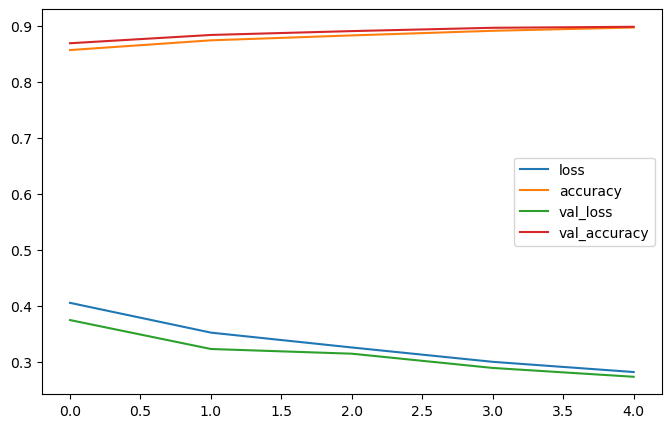

In [20]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

In [21]:
history.history

{'loss': [0.40600207448005676,
  0.35282039642333984,
  0.3262946605682373,
  0.3006640672683716,
  0.2824471890926361],
 'accuracy': [0.8574333190917969,
  0.8748166561126709,
  0.883566677570343,
  0.8918499946594238,
  0.8976666927337646],
 'val_loss': [0.37526005506515503,
  0.32358041405677795,
  0.3151934742927551,
  0.28974437713623047,
  0.2739745080471039],
 'val_accuracy': [0.8695999979972839,
  0.8844000101089478,
  0.8913000226020813,
  0.8971999883651733,
  0.8989999890327454]}

In [22]:
model.save('masoud.h5')

In [23]:
# MasoudKaviani.ir